<a href="https://colab.research.google.com/github/Tanveer132/Neural-Network/blob/main/FST_Basic_NN_with_Regression_on_california_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [2]:
train=pd.read_csv('/content/sample_data/california_housing_train.csv')
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
xtrain=train.drop(columns='median_house_value')
ytrain=train['median_house_value']


In [4]:
test=pd.read_csv('/content/sample_data/california_housing_test.csv')
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
xtest=test.drop(columns='median_house_value')
ytest=test['median_house_value']

In [6]:
scaler=StandardScaler()
sc_train=scaler.fit_transform(xtrain)
sc_test=scaler.fit_transform(xtest)


    Regression Loss Functions
        Mean Squared Error Loss
        Mean Squared Logarithmic Error Loss
        Mean Absolute Error Loss
    Binary Classification Loss Functions
        Binary Cross-Entropy
        Hinge Loss
        Squared Hinge Loss
    Multi-Class Classification Loss Functions
        Multi-Class Cross-Entropy Loss
        Sparse Multiclass Cross-Entropy Loss
        Kullback Leibler Divergence Loss


In [7]:

model=Sequential()
model.add(Dense(25,input_dim=8,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="linear"))

#Those two compilation used in case of regression in NN
#model.compile(loss="mean_absolute_error",optimizer=SGD(momentum=0.6),metrics=["mse"])
model.compile(loss="mean_squared_logarithmic_error",optimizer=SGD(momentum=0.6),metrics=["mse"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                225       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


In [8]:
# epochs 50----->each batch will pass 50 times
#batch 10
history=model.fit(sc_train,ytrain,epochs=100,batch_size=50)

Epoch 1/100
340/340 [==============================] - 1s 1ms/step - loss: 52.1658 - mse: 55917192777.5718
Epoch 2/100
340/340 [==============================] - 0s 1ms/step - loss: 17.4749 - mse: 54789790903.1789
Epoch 3/100
340/340 [==============================] - 0s 1ms/step - loss: 12.1829 - mse: 54494106705.0792
Epoch 4/100
340/340 [==============================] - 0s 988us/step - loss: 9.4768 - mse: 52508745211.4956
Epoch 5/100
340/340 [==============================] - 0s 1ms/step - loss: 7.7906 - mse: 51668068321.9707
Epoch 6/100
340/340 [==============================] - 0s 981us/step - loss: 6.6181 - mse: 50559643299.6598
Epoch 7/100
340/340 [==============================] - 0s 1ms/step - loss: 5.7463 - mse: 49974612136.1642
Epoch 8/100
340/340 [==============================] - 0s 1ms/step - loss: 5.0540 - mse: 48233817084.9971
Epoch 9/100
340/340 [==============================] - 0s 1ms/step - loss: 4.4596 - mse: 46508980193.9707
Epoch 10/100
340/340 [=================

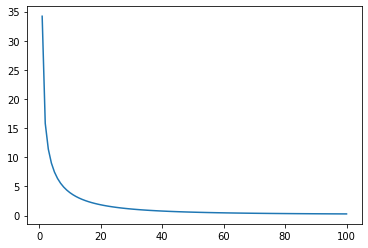

In [9]:

#plot epoch Vs Loss 
plt.plot(range(1,101),history.history["loss"])

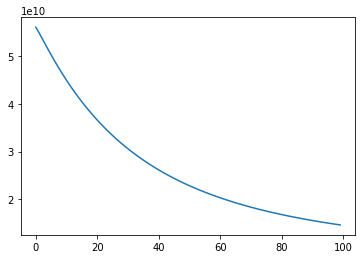

In [14]:
plt.plot(history.history["mse"])

In [15]:
ypred=model.predict(sc_test)
ypred=ypred.flatten()

In [16]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred})

,Actual,Predicted
0,344700.0,161069.843750
1,176500.0,145529.828125
2,270500.0,168185.953125
3,330000.0,185777.296875
4,81700.0,118165.453125
...,...,...
2995,225000.0,102078.265625
2996,237200.0,138825.125000
2997,62000.0,108748.687500
2998,162500.0,159678.531250
